In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.options.mode.chained_assignment = None
import nltk

import numpy as np

In [2]:
songs = pd.read_csv(r'C:\\Users\\mendo\\Desktop\\songs_final.csv', sep=';',low_memory=False,  header=0, index_col=0, encoding='cp1252')
songs

,album_uri,album_name,album_img,album_release_date,album_release_year,album_popularity,track_name,track_uri,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,key_mode,track_popularity,artist
1,0RlVSyFuyxXbZBrXRDLr3q,David Bowie,https://i.scdn.co/image/e3dcecf4888e8d6167850e...,1967-06-01,1967-06-01,35,Uncle Arthur,0uaMajzF1rrJObgvAKt4T2,0.6730,0.3500,...,0.620000,0.000000,0.0769,0.89400,100.873,132947,4,E major,26,David Bowie
2,0RlVSyFuyxXbZBrXRDLr3q,David Bowie,https://i.scdn.co/image/e3dcecf4888e8d6167850e...,1967-06-01,1967-06-01,35,Sell Me A Coat,6hDUFB7tTdp1HzDmicxnP2,0.5800,0.2680,...,0.728000,0.000000,0.0908,0.53000,125.458,183040,4,G major,24,David Bowie
3,0RlVSyFuyxXbZBrXRDLr3q,David Bowie,https://i.scdn.co/image/e3dcecf4888e8d6167850e...,1967-06-01,1967-06-01,35,Rubber Band,756SDD13DVEiDfXvO7jcgj,0.7130,0.3190,...,0.782000,0.000007,0.1150,0.44500,125.807,140333,4,B minor,25,David Bowie
4,0RlVSyFuyxXbZBrXRDLr3q,David Bowie,https://i.scdn.co/image/e3dcecf4888e8d6167850e...,1967-06-01,1967-06-01,35,Love You Till Tuesday,5CoHsiMcgvCypwbplt60IT,0.5380,0.3410,...,0.696000,0.000003,0.0596,0.84300,148.998,193973,4,C major,26,David Bowie
5,0RlVSyFuyxXbZBrXRDLr3q,David Bowie,https://i.scdn.co/image/e3dcecf4888e8d6167850e...,1967-06-01,1967-06-01,35,There Is A Happy Land,1jDTWUTl4EiEflGdsrwDGE,0.5590,0.3290,...,0.621000,0.000000,0.0654,0.55500,98.445,196293,4,A minor,24,David Bowie
6,0RlVSyFuyxXbZBrXRDLr3q,David Bowie,https://i.scdn.co/image/e3dcecf4888e8d6167850e...,1967-06-01,1967-06-01,35,We Are Hungry Men,7ohMf0XGuut01DVv4WA92X,0.4050,0.3760,...,0.150000,0.000000,0.0923,0.77300,145.511,180640,4,D major,22,David Bowie
7,0RlVSyFuyxXbZBrXRDLr3q,David Bowie,https://i.scdn.co/image/e3dcecf4888e8d6167850e...,1967-06-01,1967-06-01,35,When I Live My Dream,5Nlgd6eceYRsLRwWsmpESA,0.4820,0.1980,...,0.659000,0.000000,0.1060,0.47100,91.431,206773,4,F major,23,David Bowie
8,0RlVSyFuyxXbZBrXRDLr3q,David Bowie,https://i.scdn.co/image/e3dcecf4888e8d6167850e...,1967-06-01,1967-06-01,35,Little Bombardier,45SBKnVHfjRtOuKvgQBq3u,0.5870,0.3090,...,0.706000,0.000000,0.2250,0.59600,95.063,208120,1,G major,22,David Bowie
9,0RlVSyFuyxXbZBrXRDLr3q,David Bowie,https://i.scdn.co/image/e3dcecf4888e8d6167850e...,1967-06-01,1967-06-01,35,Silly Boy Blue,2K9HVnIXP5OriqEWkzjEZb,0.3780,0.3030,...,0.685000,0.000028,0.1250,0.32000,100.526,234267,4,C# minor,22,David Bowie
10,0RlVSyFuyxXbZBrXRDLr3q,David Bowie,https://i.scdn.co/image/e3dcecf4888e8d6167850e...,1967-06-01,1967-06-01,35,Come And Buy My Toys,3zj5ps7Zf8fwqHmHxNuhjz,0.6270,0.1880,...,0.842000,0.000002,0.1060,0.53900,106.177,130587,4,G major,21,David Bowie


In [3]:
lyrics = pd.read_csv(r'C:\\Users\\mendo\\Desktop\\lyrics_final.csv', sep='\t',low_memory=False,  header=0, index_col=0, encoding='cp1252')
lyrics.head(5)

,title,track_n,text,album
1,London Calling,1,London calling to the faraway towns,London Calling
2,London Calling,1,Now war is declared and battle come down,London Calling
3,London Calling,1,London calling to the underworld,London Calling
4,London Calling,1,"Come outta' the cupboard, ya' boys and girls",London Calling
5,London Calling,1,"London calling, now don't look to us",London Calling


In [4]:
songs.columns.values

array(['album_uri', 'album_name', 'album_img', 'album_release_date',
       'album_release_year', 'album_popularity', 'track_name', 'track_uri',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'key_mode', 'track_popularity',
       'artist'], dtype=object)

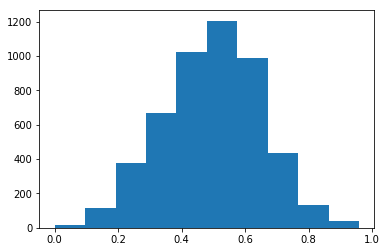

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(songs.danceability)
plt.show()

In [6]:
import re
lyrics = lyrics.sort_values(['album', 'title']).reset_index(drop=True).dropna()

t = []
for row in lyrics['title']:
    t.append((row.split(' (', 1)[0]).lower())
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append((row.split(' [', 1)[0]).lower())
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append((row.split(' -', 1)[0]).lower())
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append(re.sub('\'', '', row))
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append(re.sub(',', '', row))
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append(re.sub('\&', 'and', row))
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append(re.sub('in\'', 'ing', row))
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append(re.sub('4', 'four', row))
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append(re.sub('5', 'five', row))
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append(re.sub('#!*@', 'fuck', row))
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append(re.sub('\?', '', row))
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append(re.sub('\.', '', row))
lyrics['title'] = t

t = []
for row in lyrics['title']:
    t.append(re.sub('\&', 'and', row))
lyrics['title'] = t

t = []
for row in lyrics['album']:
    t.append((re.sub('\'', '', row)).lower())  
lyrics['album'] = t

t = []
for row in lyrics['album']:
    t.append((re.sub('\.', '', row)).lower())  
lyrics['album'] = t

t = []
for row in lyrics['album']:
    t.append((row.split(' -', 1)[0]).lower())  
lyrics['album'] = t

t = []
for row in lyrics['album']:
    t.append((row.split(' (', 1)[0]).lower())  
lyrics['album'] = t

lyrics = lyrics.drop_duplicates()
lyrics['ID'] = lyrics['album'] + ' - ' + lyrics['title']

lyrics = lyrics.groupby(['title','track_n', 'album', 'ID'])['text'].apply(lambda x: ','.join(x)).reset_index().sort_values(['album', 'track_n'])

In [7]:
songs = songs.sort_values(['album_name', 'track_name']).reset_index(drop=True)

t = []
for row in songs['track_name']:
    t.append((row.split(' (', 1)[0]).lower())
songs['track_name'] = t

t = []
for row in songs['track_name']:
    t.append((row.split(' [', 1)[0]).lower())
songs['track_name'] = t

t = []
for row in songs['track_name']:
    t.append((row.split(' -', 1)[0]).lower())
songs['track_name'] = t

t = []
for row in songs['track_name']:
    t.append(re.sub('\'', '', row))
songs['track_name'] = t

t = []
for row in songs['track_name']:
    t.append(re.sub('\&', 'and', row))
songs['track_name'] = t

t = []
for row in songs['track_name']:
    t.append(re.sub(',', '', row))
songs['track_name'] = t

t = []
for row in songs['track_name']:
    t.append(re.sub('\&', 'and', row))
songs['track_name'] = t

t = []
for row in songs['track_name']:
    t.append(re.sub('in\'', 'ing', row))
songs['track_name'] = t

t = []
for row in songs['track_name']:
    t.append(re.sub('4', 'four', row))
songs['track_name'] = t

t = []
for row in songs['track_name']:
    t.append(re.sub('5', 'five', row))
songs['track_name'] = t

t = []
for row in songs['track_name']:
    t.append(re.sub('#!*@', 'fuck', row))
songs['track_name'] = t

t = []
for row in songs['track_name']:
    t.append(re.sub('\?', '', row))
songs['track_name'] = t

t = []
for row in songs['track_name']:
    t.append(re.sub('\.', '', row))
songs['track_name'] = t

t = []
for row in songs['album_name']:
    t.append((re.sub('\'', '', row)).lower())  
songs['album_name'] = t

t = []
for row in songs['album_name']:
    t.append((re.sub(' the remaster', '', row)).lower())  
songs['album_name'] = t

t = []
for row in songs['album_name']:
    t.append((re.sub('\.', '', row)).lower())  
songs['album_name'] = t

t = []
for row in songs['album_name']:
    t.append((row.split(' -', 1)[0]).lower())  
songs['album_name'] = t

t = []
for row in songs['album_name']:
    t.append((row.split(' (', 1)[0]).lower())  
songs['album_name'] = t

songs = songs.drop_duplicates()
songs['ID'] = songs['album_name'] + ' - ' + songs['track_name']

In [8]:
match_up = lyrics.merge(songs, how='left', on='ID').drop_duplicates(['artist', 'text'])
match_up = match_up.dropna()

In [9]:
cover_dict = {'a sailors guide to earth - in bloom':1, 'axis: bold as love - shes so fine':1,
              'electric ladyland - come on':1, 'electric ladyland - all along the watchtower':1,
             'high top mountain - poor rambler':1, 'high top mountain - id have to be crazy':1,
             'london calling - brand new cadillac':1, 'london calling - the guns of brixton':1,
             'london calling - wrong em boyo':1, 'london calling - revolution rock':1,
             'metamodern sounds in country music - the promise':1, 'pink flag - different to me':1,
             'ramones - lets dance':1, 'road to ruin - needles and pins':1,
             'rocket to russia - do you wanna dance':1, 'rocket to russia - surfin bird':1,
             'sandinista! - junco partner':1, 'sandinista! - look here':1,
             'station to station - wild is the wind':1, 'the clash - police and thieves':1,
             'the late great townes van zandt - fraulein':1, 'the silver tongued devil and i - good christian soldier':1,
             'young americans - across the universe':1, 'jesus was a capricorn - jesus was a capricorn':1}
match_up['cover'] = match_up['ID'].map(cover_dict).fillna(0)
match_up = match_up[match_up['cover'] != 1]
match_up

,title,track_n,album,ID,text,album_uri,album_name,album_img,album_release_date,album_release_year,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,key_mode,track_popularity,artist,cover
0,welcome to earth,1,a sailors guide to earth,a sailors guide to earth - welcome to earth,"Hello, my son,Welcome to earth,You may not be ...",5I3UdCxtIh6hkQ7rMPUvA4,a sailors guide to earth,https://i.scdn.co/image/f90a0b30265942fcc5096e...,2016-04-15,2016-04-15,...,0.002920,0.0962,0.0773,122.670,293400.0,4.0,D major,53.0,Sturgill Simpson,0.0
1,breakers roar,2,a sailors guide to earth,a sailors guide to earth - breakers roar,"Oh, how the breakers roar,They keep pulling me...",5I3UdCxtIh6hkQ7rMPUvA4,a sailors guide to earth,https://i.scdn.co/image/f90a0b30265942fcc5096e...,2016-04-15,2016-04-15,...,0.514000,0.2450,0.1650,84.410,212587.0,4.0,B minor,58.0,Sturgill Simpson,0.0
2,keep it between the lines,3,a sailors guide to earth,a sailors guide to earth - keep it between the...,"Don't turn mailboxes into baseballs,Don't get ...",5I3UdCxtIh6hkQ7rMPUvA4,a sailors guide to earth,https://i.scdn.co/image/f90a0b30265942fcc5096e...,2016-04-15,2016-04-15,...,0.001960,0.3490,0.8330,87.584,241147.0,4.0,D major,55.0,Sturgill Simpson,0.0
3,sea stories,4,a sailors guide to earth,a sailors guide to earth - sea stories,"Basic was just like papaw says:,\Keep your mou...",5I3UdCxtIh6hkQ7rMPUvA4,a sailors guide to earth,https://i.scdn.co/image/f90a0b30265942fcc5096e...,2016-04-15,2016-04-15,...,0.000004,0.6360,0.7640,79.264,196880.0,4.0,F major,51.0,Sturgill Simpson,0.0
5,brace for impact,6,a sailors guide to earth,a sailors guide to earth - brace for impact,"One day you wake up,And this life will be over...",5I3UdCxtIh6hkQ7rMPUvA4,a sailors guide to earth,https://i.scdn.co/image/f90a0b30265942fcc5096e...,2016-04-15,2016-04-15,...,0.313000,0.1110,0.6550,89.998,349267.0,4.0,C major,58.0,Sturgill Simpson,0.0
6,all around you,7,a sailors guide to earth,a sailors guide to earth - all around you,"There will be days,When the sun won't shine,Wh...",5I3UdCxtIh6hkQ7rMPUvA4,a sailors guide to earth,https://i.scdn.co/image/f90a0b30265942fcc5096e...,2016-04-15,2016-04-15,...,0.173000,0.1360,0.5140,185.725,215693.0,3.0,A major,54.0,Sturgill Simpson,0.0
7,oh sarah,8,a sailors guide to earth,a sailors guide to earth - oh sarah,"Oh Sarah, here we go again,I can't get past th...",5I3UdCxtIh6hkQ7rMPUvA4,a sailors guide to earth,https://i.scdn.co/image/f90a0b30265942fcc5096e...,2016-04-15,2016-04-15,...,0.004720,0.3920,0.0917,84.646,255053.0,4.0,C major,49.0,Sturgill Simpson,0.0
8,call to arms,9,a sailors guide to earth,a sailors guide to earth - call to arms,"I done Syria, Afganistan, Iraq, and Iran,North...",5I3UdCxtIh6hkQ7rMPUvA4,a sailors guide to earth,https://i.scdn.co/image/f90a0b30265942fcc5096e...,2016-04-15,2016-04-15,...,0.001650,0.0886,0.6070,151.996,329640.0,4.0,B minor,49.0,Sturgill Simpson,0.0
10,manic depression,2,are you experienced,are you experienced - manic depression,"Manic depression is touching my soul,I know wh...",719ELjvRzp0lHiLyAuAGj3,are you experienced,https://i.scdn.co/image/89ff9225a558caff387456...,1967-05-12,1967-05-12,...,0.061900,0.1510,0.7470,149.687,222227.0,3.0,C# major,40.0,Jimi Hendrix,0.0
11,red house,3,are you experienced,are you experienced - red house,"(Ah yeah!),There's a red house over yonder,Tha...",719ELjvRzp0lHiLyAuAGj3,are you experienced,https://i.scdn.co/image/89ff9225a558caff387456...,1967-05-12,1967-05-12,...,0.077700,0.1850,0.4300,198.958,224453.0,3.0,B major,42.0,Jimi Hendrix,0.0


In [10]:
#match_up.to_csv('C:\\Users\\mendo\\Desktop\\match_up_final.csv')

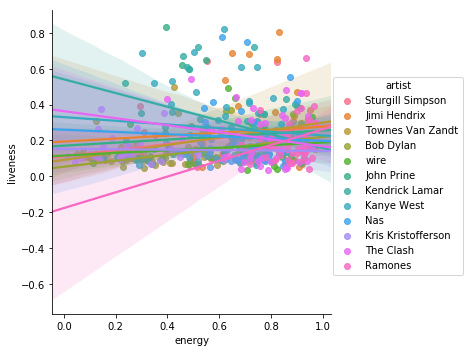

In [11]:
sns.lmplot(data=match_up, x='energy', y='liveness', hue='artist')
plt.show()

In [12]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models.tfidfmodel import TfidfModel
from sklearn.feature_extraction.text import TfidfTransformer
from gensim.corpora.dictionary import Dictionary

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction import text 

stop_words = text.ENGLISH_STOP_WORDS.union(['yeah', 'ya', 'no', 'woah', 'ooh'])

C:\Users\mendo\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [13]:
#VERSION 1

y = match_up['artist']

X_train, X_test, y_train, y_test = train_test_split(match_up['text'], y, test_size=0.5, random_state=42, stratify=y)

text_clf = Pipeline([('vect', CountVectorizer(stop_words=stop_words)),
                     ('tfidf', TfidfTransformer()),
                     ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                               alpha=1e-3, n_iter=5, random_state=42))])

text_clf.fit(X_train, y_train)
pred = text_clf.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
score

C:\Users\mendo\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.60368663594470051

In [14]:
test1 = pd.DataFrame(y_test).reset_index()
test2 = pd.DataFrame(X_test).reset_index()

rig = test1.merge(test2, how='inner', on='index')
rig['pred'] = pred

a = []
for index, row in rig.iterrows():
    if row['artist'] == row['pred']:
        a.append(1)
    else:
        a.append(0)
        
rig['pred_binary'] = a
rig['count'] = 1

misses = rig[rig['pred_binary']==0]

In [15]:
rig.sort_values('artist')

,index,artist,text,pred,pred_binary,count
184,54,Bob Dylan,"Early in the mornin',I'm callin' you to,Please...",Bob Dylan,1,1
27,50,Bob Dylan,"You say ya' love me,And you're thinkin' of me,...",Kanye West,0,1
60,254,Bob Dylan,"I pity the poor immigrant,Who wishes he would'...",Sturgill Simpson,0,1
61,47,Bob Dylan,"(Intro),Oh, the ragman draws circles,Up and do...",Bob Dylan,1,1
112,43,Bob Dylan,"Well, early in the morning,'Til late at night,...",John Prine,0,1
121,63,Bob Dylan,"If you see her, say hello, she might be in Tan...",Kris Kristofferson,0,1
18,65,Bob Dylan,"Buckets of rain,Buckets of tears,Got all them ...",Bob Dylan,1,1
144,257,Bob Dylan,"Close your eyes, close the door,Ya' don't have...",Ramones,0,1
149,251,Bob Dylan,"“Oh, help me in my weakness”,I heard the drift...",The Clash,0,1
132,64,Bob Dylan,"'Twas in another lifetime,One of toil and bloo...",Bob Dylan,1,1


In [16]:
info = rig[['artist', 'pred', 'count']]
info = pd.pivot_table(info, values='count', index='artist', columns=['pred'], aggfunc=np.sum, fill_value=0)
info

pred,Bob Dylan,Jimi Hendrix,John Prine,Kanye West,Kendrick Lamar,Kris Kristofferson,Nas,Ramones,Sturgill Simpson,The Clash,Townes Van Zandt,wire
artist,,,,,,,,,,,,
Bob Dylan,7,1,1,1,0,1,0,1,1,3,1,0
Jimi Hendrix,0,11,2,1,0,0,0,1,1,0,1,0
John Prine,2,1,3,0,0,3,0,0,5,1,1,1
Kanye West,1,0,0,21,1,0,0,1,0,0,1,1
Kendrick Lamar,1,1,0,4,13,0,0,0,0,0,0,0
Kris Kristofferson,1,2,1,1,0,9,0,0,0,0,0,1
Nas,0,0,0,0,0,0,19,0,0,0,0,0
Ramones,3,4,0,1,0,1,0,5,0,1,2,2
Sturgill Simpson,0,0,0,2,1,2,0,1,7,0,0,0


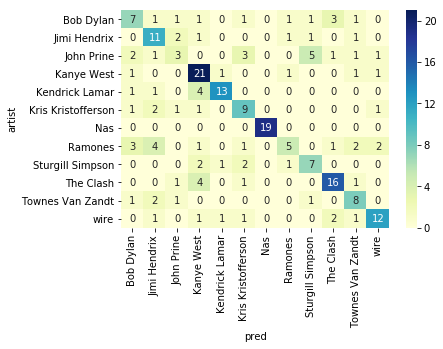

In [17]:
sns.heatmap(info, cmap="YlGnBu", annot=True)
plt.show()

In [18]:
docs = list(match_up['text'])
tokenized_docs = [word_tokenize(doc.lower()) for doc in docs]
dictionary = Dictionary(tokenized_docs)

corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

In [19]:
docs = list(lyrics['text'])
tokenized_docs = [word_tokenize(doc.lower()) for doc in docs]
dictionary = Dictionary(tokenized_docs)

corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
doc = corpus[0]

tfidf = TfidfModel(corpus)

tfidf_weights = tfidf[doc]
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)
for term_id, weight in sorted_tfidf_weights[:20]:
    print(dictionary.get(term_id), weight)

cry 0.401995573159
greatest 0.261192907789
known 0.250052579724
hearing 0.234857976078
fisherman 0.175685932867
how 0.161509575012
earth 0.160798229264
makes 0.160798229264
ever 0.15876158237
wish 0.157182049641
've 0.146594092211
grandfather 0.136847969648
treasure 0.130596453894
measure 0.125488593605
loves 0.121169959265
always 0.118344086422
breaks 0.117428988039
hello 0.117428988039
everyday 0.114129217561
seeing 0.111177472285


In [20]:
#nltk.download('wordnet')

In [21]:
tokens = [w for w in word_tokenize(lyrics['text'][0].lower()) if w.isalpha()]
no_stops = [t for t in tokens if t not in stopwords.words('english')]

Counter(no_stops).most_common(5)

lemm = WordNetLemmatizer()

In [22]:
for album in range(0,9):
    tokens = [w for w in word_tokenize(lyrics['text'][album].lower()) if w.isalpha()]
    no_stops = [t for t in tokens if t not in stopwords.words('english')]
    lemmatized = [lemm.lemmatize(t) for t in no_stops]
    count = Counter(lemmatized).most_common(5)
    corpus = Counter(lemmatized)
    print(lyrics['album'][album] + ': ' + str(count))

pink flag: [('got', 2), ('corner', 2), ('alright', 1), ('saw', 1), ('mag', 1)]
pink flag: [('prefers', 2), ('find', 2), ('important', 2), ('room', 1), ('paint', 1)]
electric ladyland: [('well', 4), ('last', 3), ('u', 3), ('yeah', 3), ('style', 3)]
good kid, maad city: [('know', 4), ('baby', 3), ('see', 3), ('got', 3), ('mind', 3)]
to pimp a butterfly: [('time', 12), ('nigga', 11), ('mic', 10), ('come', 10), ('many', 7)]
good kid, maad city: [('nigga', 16), ('yawk', 7), ('shit', 7), ('ai', 6), ('hood', 6)]
to pimp a butterfly: [('ai', 11), ('know', 7), ('nigga', 6), ('feel', 4), ('shit', 4)]
sweet revenge: [('time', 4), ('would', 4), ('something', 3), ('till', 3), ('know', 2)]
metamodern sounds in country music: [('got', 4), ('ta', 4), ('need', 4), ('little', 3), ('light', 3)]
